# Data Science Learning Notebook
This notebook will teach you the basics of numpy, pandas, matplotlib, and seaborn. We will generate fake train and test data, perform data manipulation, and visualize the data.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

## Numpy Basics
Numpy is a powerful library for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions.

In [2]:
# Create a numpy array
array = np.array([1, 2, 3, 4, 5])
print("Numpy Array:", array)

# Create a 2D numpy array (matrix)
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Numpy Matrix:\n", matrix)

# Perform basic operations
print("Sum of array:", np.sum(array))
print("Mean of matrix:", np.mean(matrix))

Numpy Array: [1 2 3 4 5]
Numpy Matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of array: 15
Mean of matrix: 5.0


## Pandas Basics
Pandas is a powerful library for data manipulation and analysis. It provides data structures like Series and DataFrame.

In [3]:
# Create a pandas Series
series = pd.Series([1, 2, 3, 4, 5])
print("Pandas Series:\n", series)

# Create a pandas DataFrame
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8], 'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)
print("Pandas DataFrame:\n", df)

# Perform basic operations
print("Sum of column A:", df['A'].sum())
print("Mean of DataFrame:", df.mean())

Pandas Series:
 0    1
1    2
2    3
3    4
4    5
dtype: int64
Pandas DataFrame:
    A  B   C
0  1  5   9
1  2  6  10
2  3  7  11
3  4  8  12
Sum of column A: 10
Mean of DataFrame: A     2.5
B     6.5
C    10.5
dtype: float64


## Generating Fake Train and Test Data
We will generate fake train and test data using numpy and pandas.

In [4]:
# Generate fake data
np.random.seed(0)  # For reproducibility
train_data = np.random.randn(100, 4)  # 100 rows, 4 columns
test_data = np.random.randn(20, 4)  # 20 rows, 4 columns

# Create pandas DataFrames
train_df = pd.DataFrame(train_data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

print("Train DataFrame:\n", train_df.head())
print("Test DataFrame:\n", test_df.head())

Train DataFrame:
    Feature1  Feature2  Feature3  Feature4
0  1.764052  0.400157  0.978738  2.240893
1  1.867558 -0.977278  0.950088 -0.151357
2 -0.103219  0.410599  0.144044  1.454274
3  0.761038  0.121675  0.443863  0.333674
4  1.494079 -0.205158  0.313068 -0.854096
Test DataFrame:
    Feature1  Feature2  Feature3  Feature4
0 -0.598654 -1.115897  0.766663  0.356293
1 -1.768538  0.355482  0.814520  0.058926
2 -0.185054 -0.807648 -1.446535  0.800298
3 -0.309114 -0.233467  1.732721  0.684501
4  0.370825  0.142062  1.519995  1.719589


## Data Manipulation
We will perform some basic data manipulation using pandas.

In [5]:
# Add a new column to train DataFrame
train_df['Target'] = np.random.randint(0, 2, size=100)  # Binary target variable
print("Train DataFrame with Target:\n", train_df.head())

# Filter rows where Target is 1
filtered_df = train_df[train_df['Target'] == 1]
print("Filtered DataFrame (Target=1):\n", filtered_df.head())

Train DataFrame with Target:
    Feature1  Feature2  Feature3  Feature4  Target
0  1.764052  0.400157  0.978738  2.240893       0
1  1.867558 -0.977278  0.950088 -0.151357       0
2 -0.103219  0.410599  0.144044  1.454274       1
3  0.761038  0.121675  0.443863  0.333674       1
4  1.494079 -0.205158  0.313068 -0.854096       1
Filtered DataFrame (Target=1):
    Feature1  Feature2  Feature3  Feature4  Target
2 -0.103219  0.410599  0.144044  1.454274       1
3  0.761038  0.121675  0.443863  0.333674       1
4  1.494079 -0.205158  0.313068 -0.854096       1
5 -2.552990  0.653619  0.864436 -0.742165       1
7  1.532779  1.469359  0.154947  0.378163       1


In [6]:
# Add new features based on existing ones
train_df['Feature_Sum'] = train_df['Feature1'] + train_df['Feature2']
train_df['Feature_Diff'] = train_df['Feature3'] - train_df['Feature4']
train_df['Feature_Product'] = train_df['Feature1'] * train_df['Feature3']
train_df['Feature_Ratio'] = train_df['Feature2'] / (train_df['Feature4'] + 1e-5)  # Adding a small value to avoid division by zero

print("Train DataFrame with Intermediate Features:\n", train_df.head())

Train DataFrame with Intermediate Features:
    Feature1  Feature2  Feature3  Feature4  Target  Feature_Sum  Feature_Diff  \
0  1.764052  0.400157  0.978738  2.240893       0     2.164210     -1.262155   
1  1.867558 -0.977278  0.950088 -0.151357       0     0.890280      1.101446   
2 -0.103219  0.410599  0.144044  1.454274       1     0.307380     -1.310230   
3  0.761038  0.121675  0.443863  0.333674       1     0.882713      0.110189   
4  1.494079 -0.205158  0.313068 -0.854096       1     1.288921      1.167163   

   Feature_Product  Feature_Ratio  
0         1.726545       0.178570  
1         1.774345       6.457191  
2        -0.014868       0.282337  
3         0.337797       0.364641  
4         0.467748       0.240208  


## Data Visualization with Matplotlib and Seaborn
We will visualize the data using matplotlib and seaborn.

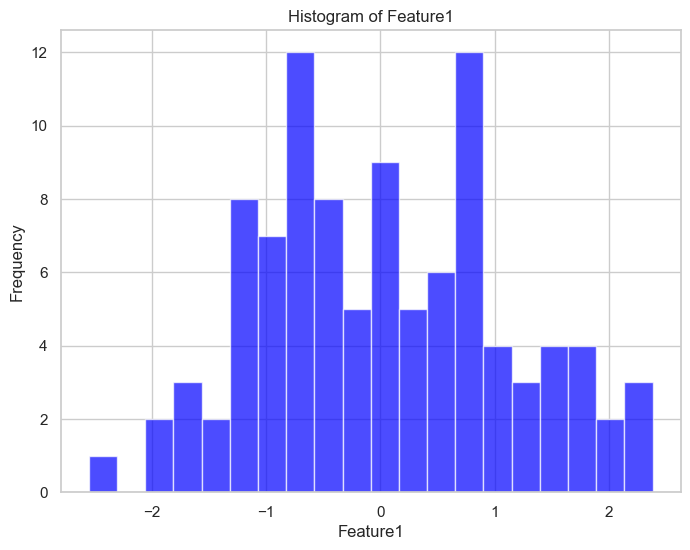

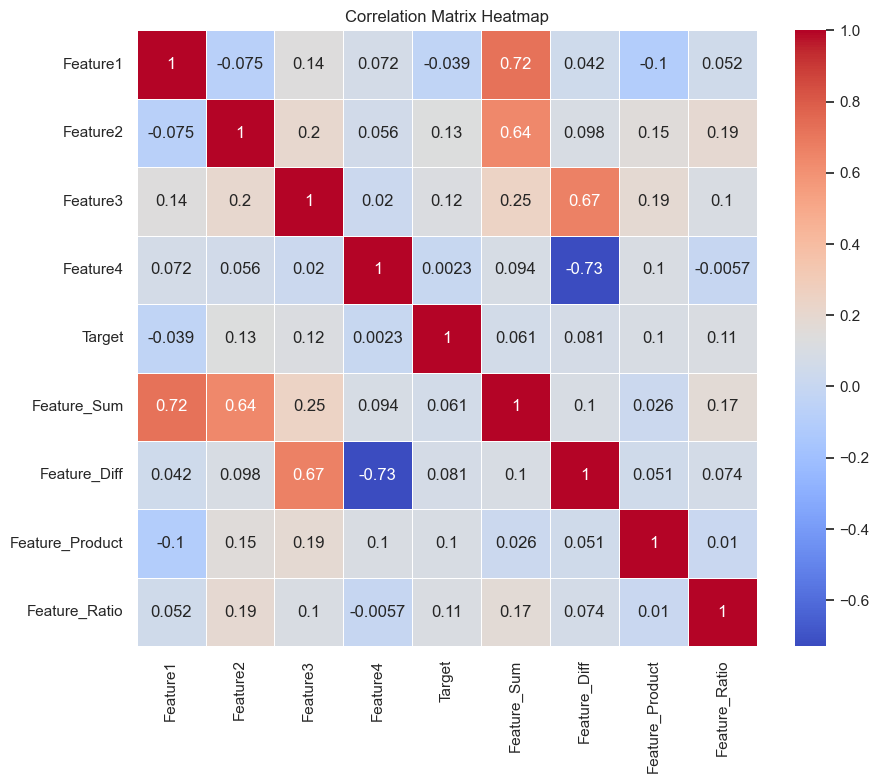

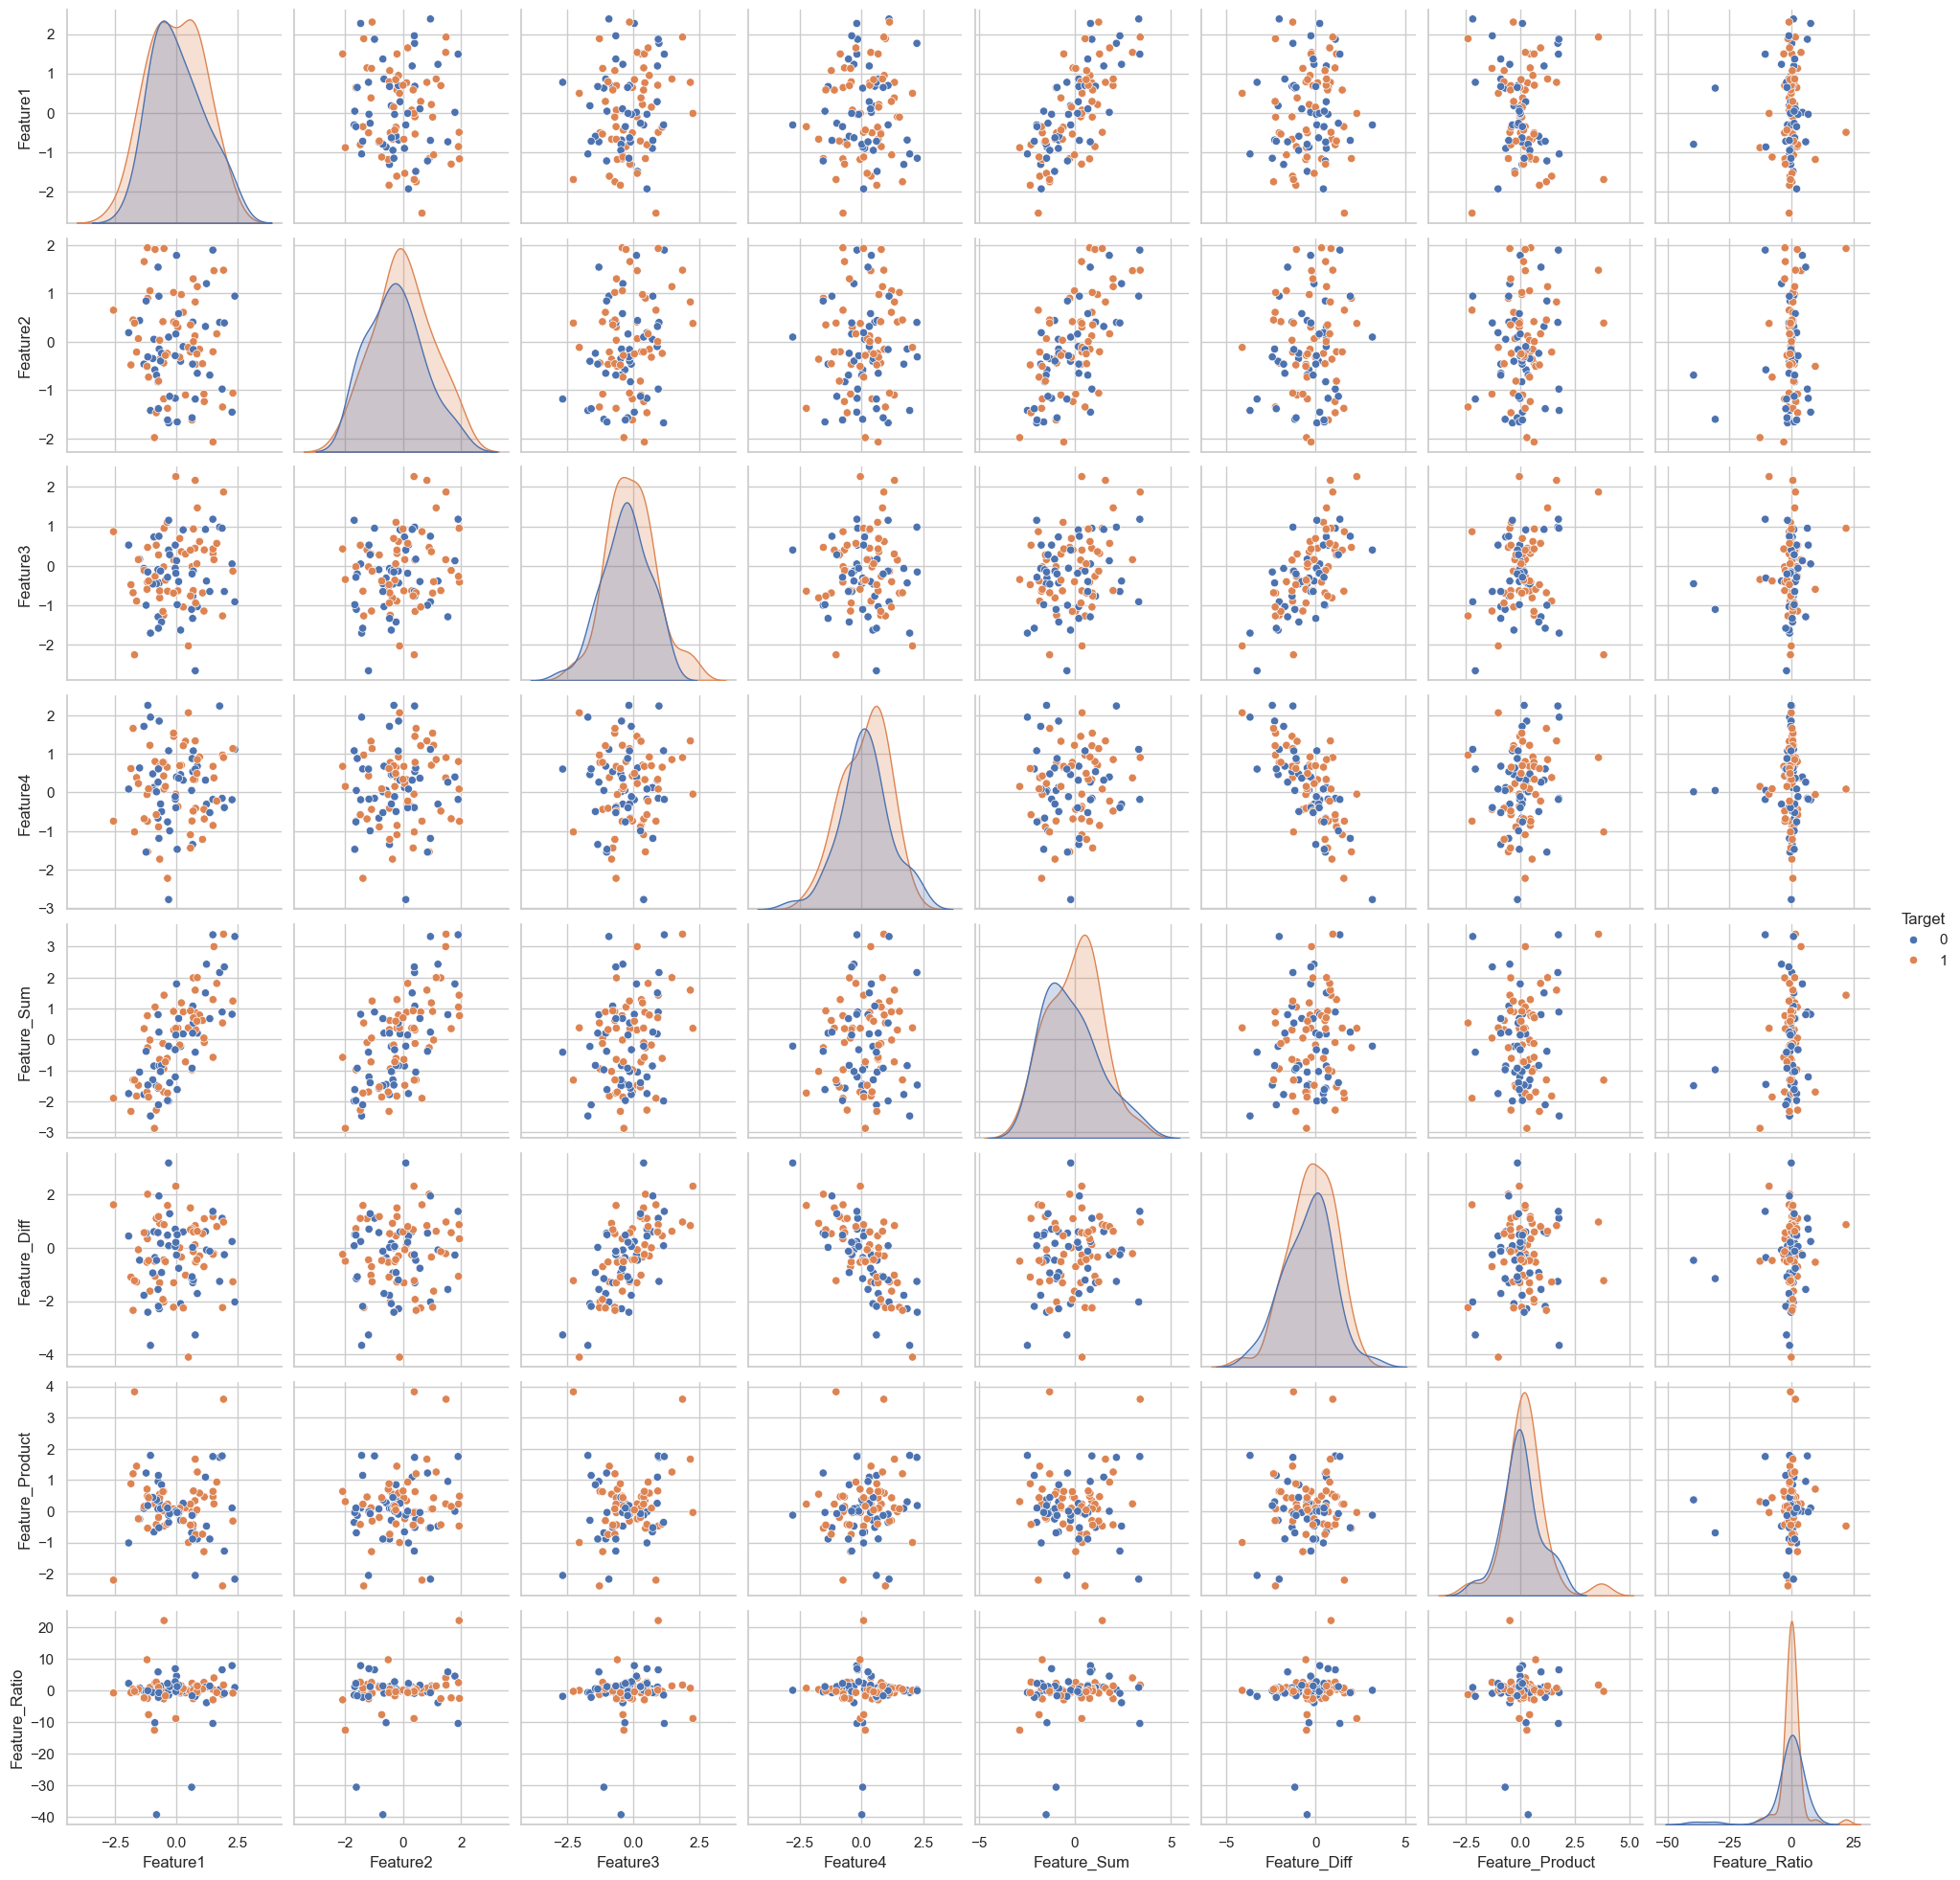

In [7]:
# Plot a histogram of Feature1
plt.figure(figsize=(8, 6))
plt.hist(train_df['Feature1'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Feature1')
plt.xlabel('Feature1')
plt.ylabel('Frequency')
plt.show()

# Plot a seaborn heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot a pairplot of the train DataFrame
sns.pairplot(train_df, hue='Target')
plt.show()

## Using Sklearn for Model Training and Evaluation
We will use sklearn to train a simple model and evaluate its performance.

In [8]:
# Import necessary libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into train and validation sets
X = train_df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature_Sum', 'Feature_Diff', 'Feature_Product', 'Feature_Ratio']]
y = train_df['Target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.45
Confusion Matrix:
 [[ 3  1]
 [10  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.86      0.38      0.52        16

    accuracy                           0.45        20
   macro avg       0.54      0.56      0.44        20
weighted avg       0.73      0.45      0.49        20



Diffrent Models can produce diffrenct accuracys. Using train test split ensure that the accuracy is acurate 

In [9]:
# Import necessary libraries from sklearn
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_dt = dt_model.predict(X_val)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_val, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
class_report_dt = classification_report(y_val, y_pred_dt)

print("Decision Tree Classifier Accuracy:", accuracy_dt)
print("Decision Tree Classifier Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classifier Classification Report:\n", class_report_dt)

Decision Tree Classifier Accuracy: 0.25
Decision Tree Classifier Confusion Matrix:
 [[ 2  2]
 [13  3]]
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.50      0.21         4
           1       0.60      0.19      0.29        16

    accuracy                           0.25        20
   macro avg       0.37      0.34      0.25        20
weighted avg       0.51      0.25      0.27        20



In [10]:
# Import necessary libraries from sklearn
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
class_report_rf = classification_report(y_val, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classifier Classification Report:\n", class_report_rf)

Random Forest Classifier Accuracy: 0.3
Random Forest Classifier Confusion Matrix:
 [[ 1  3]
 [11  5]]
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.25      0.12         4
           1       0.62      0.31      0.42        16

    accuracy                           0.30        20
   macro avg       0.35      0.28      0.27        20
weighted avg       0.52      0.30      0.36        20

